# ACM20030 - Midterm 2

In [1]:
# Import NumPy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

# Question 0: ordinary differential equations

All the below questions should be answered by using `RK2()` method below:

In [3]:
def RK2(f, dx, x0, y0, imax):
    xi = x0
    yi = y0
    i = 0
    while i < imax:
        k1 = dx*f(xi, yi)
        k2 = dx*f(xi + dx, yi + k1)
    
        yi = yi + 0.5*(k1 + k2)
                
        xi += dx
        i  += 1
        
    return [xi, yi]

solve the following problems:

## Q0a [5 marks]

Numerically solve the first-order differential equation:

$$ \frac{dy}{dx} = \frac{\sqrt{1+2y}}{\sqrt{1+2x}}$$

with $y(0) = 2$ and find the value of $y(10)$. Use a stepsize of $\Delta x = 0.01$

In [4]:
def dydx(x, y):
    return (np.sqrt(1+2*y)/np.sqrt(1+2*x))

In [5]:
#Input x value to give solution at this point:
x = 10

dx = 0.01
imax = x/dx

solution = RK2(dydx, dx, 0, 2, imax)

#Solution at x = 10: Note, y value is second number in array
solution[1]

16.42834153670337

## Q0b [6 marks]

By writing the following integral as a first-order differential equation, numeically evaluate:

$$ \int_0^b x\sin(x^2)\, dx$$

where $b = \sqrt{\pi/2}$ using the RK2 function provided above. Use 1000 steps to make the calculation. Reminder: `np.pi` gives you the value of $\pi$.

<b> x0 comes from lower condition, y0 comes from no coefficient before integral E.g: $5 + \int xsin(x^2)$ would return 5 when x=0, => y0 would = 5

In [6]:
# y'(x) = f(x) that is simply the equation inside the integral
def dydx(x, y):
    return x*np.sin(x**2)

In [7]:
#Input x value to give solution at this point:
b = np.sqrt(np.pi/2)

dx = 1/1000
imax = b/dx
solution = RK2(dydx, dx, 0, 0, imax)

# Solution to integral is y value of rk2 solution (2nd value in output array)
solution[1]

0.5008599190613202

# Q0c [7 marks]

By writing it in first-order form, solve $$ \frac{d^2y}{d x^2} = -\frac{1}{10}y + \frac{y}{x} $$

with $y(5) = 0, y'(5) = 1$. Use 1000 steps to evaluate the solution at $x=15$.

### First Order Form
$$v(x) = y'(x) = 0$$ <br>
$$v'(x) = y''(x) = -\frac{1}{10}y + \frac{y}{x}$$

In [8]:
#Numerical Solution
def f2(x, y):
    return np.array([y[1], -y[0]/10 + y[0]/x])

# Input x Value (***Our x value is the number of steps from the initial position of 5 => x=10 gives us 15)
x = 15-5
dx = 1/1000
imax = x/dx

A = RK2(f2, dx, 5, [5, 1], imax)
A[1][0]

23.12203530397812

In [9]:
# Import NumPy, linalg and matplotlib
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [10]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

# Question 1: numerical integration

Use the `SimpsonsIntegrate` function below when answer this question

In [11]:
def SimpsonsIntegrate(f, a, b, N):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        xi += dx
        i+= 1
        
    return area

## Q1a [4 marks]

Numerically evaluate $$\int_0^1 \sin(x)\, dx$$

Compare your answer to the analytic result and use enough strips in the integration so that the relative error drops below `1e-10`, and show your result is at least this accurate.

In [12]:
def f(x):
    return np.sin(x)

Integral = SimpsonsIntegrate(f, 0, 1, 40)
print('Integral =', Integral)

#Show accuracy:
Real_Value = -np.cos(1) + np.cos(0)
print('Error =', Integral - Real_Value)

Integral = 0.4596976941942121
Error = 6.235184590863696e-11


## Q1b [6 marks]

By computing the numerical integral using N=10, 100 and 1000 strips, show that the Simpsons method converges as $N^{-4}$ to the correct answer for the above integral. Do this by plotting the difference between the approximations and the true result on a log-log plot, along with a $N^{-4}$ reference line.

In [13]:
imax = 3

ErrorSimp = np.empty((imax,2));

i = 0
N = 10
while i < imax:
    ErrorSimp[i,0] = N
    ErrorSimp[i,1] = np.abs(SimpsonsIntegrate(f, 0, 1, N) - Real_Value)
    N *= 2
    i += 1

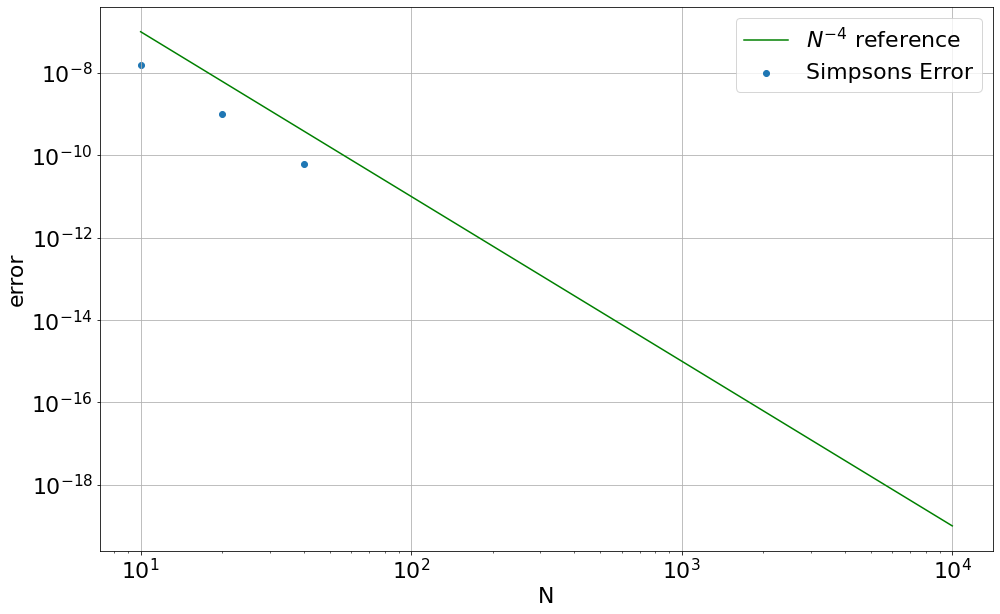

In [14]:
x = np.linspace(10,1e4)
N4ref = 0.001*x**-4

plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.plot(x,N4ref, color='green')

plt.scatter(ErrorSimp[:,0], ErrorSimp[:,1])
plt.legend(['$N^{-4}$ reference','Simpsons Error']);

# Question 2 : matrix norms

## Q2a [4 marks]

The dot product of two vectors $a$, $b$, each of length $n$ is given by

$$ a\cdot b = \sum_{i=1}^n a_i b_i$$

Two sample vectors and their dot product are given below

In [15]:
a = np.array([4.5, 6.7, 6.7])
b = np.array([8.8, -4.5, 3.3])

print("The dot product of a and b is:", np.dot(a,b))

The dot product of a and b is: 31.56


Complete the `DotProduct` function below to compute the dot product by using a loop (do not use `np.dot()` or a similar function). Test your answer on the vectors $a$ and $b$.

In [16]:
def DotProduct(a,b):
    i = 0
    dotsum = 0
    while i < np.size(a):
        dotsum += a[i]*b[i]
        i +=1
    return dotsum

In [17]:
print(DotProduct(a, b))

31.56


## Q2b [6 marks]

In the lectures we looked at the $L^2$-norm. Another matrix norm is the Frobenius norm, $\lVert \cdot \rVert_F$ of a $m\times n$ matrix $A$ is defined as 

$$ \lVert A \rVert_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2 }$$

Complete the `FrobeniusNorm()` function below make it compute the Frobenius norm of a matrix using loops (don't use `la.norm`, or a similar function). 

In [21]:
def FrobeniusNorm(A):
    (r, c) = A.shape
    norm = 0
    i = 0
    while i < r:
        j = 0
        while j < c:
            norm += (A[i,j])**2
            j += 1
        i += 1
        
    return np.sqrt(norm)

Test your function using the below matrix. The `la.norm(A)` function returns the value of the Frobenius norm. You can use this to compare against your answer.

In [22]:
A = np.array([[1.4,-3.5,4.6],[4.5, 3.5, 6.6],[-7.7,5.5,6.6],[4.5,-4.5,4.3]])

In [24]:
print(la.norm(A))
print(FrobeniusNorm(A))

17.421825392306054
17.421825392306054


# Question 3: eigensystems


## Q3a [4 marks]


Using `la.eig()` compute the eigenvalues and eigenvectors of the matrix B below. Use a `for` loop that evaluates the left hand side of

$$ B.x - \lambda x =0$$

for each eigenvalue/eigenvector pair.

Reminder: `la.eig()` returns the eigenvalues and eigenvectors, and the eigenvectors are stored as the columns of a matrix.

Suggestion: write code that first tests one eigenvalue/eigenvector pair then write the loop that tests each pair in turn

# X = Eigenvector
# $\lambda = Eigenvalue$

In [26]:
B = np.array([[1.3, 4.5, 5.4], [5.6, 4.5 ,7.8], [6.0, 4.5,0.9]])

In [55]:
eigenSystem = la.eig(B)
print("Eigenvalues =", eigenSystem[0])
for i in range(3):
    print("\nEigenvector %d\n" %(i+1), eigenSystem[1][:,i])   # The eigen vectors are the columns of this matrix

Eigenvalues = [13.50189951 -2.23566197 -4.56623754]

Eigenvector 1
 [-0.48410682 -0.72528947 -0.48948522]

Eigenvector 2
 [-0.39044521  0.81669186 -0.42493169]

Eigenvector 3
 [-0.39740521 -0.44498051  0.80253439]


In [68]:
for i in range(3):
    result = np.dot(B, eigenSystem[1][:,i]) - eigenSystem[0][i]*eigenSystem[1][:,i]
    print(result)

[-2.66453526e-15  1.77635684e-15  3.55271368e-15]
[-5.55111512e-16 -1.55431223e-15 -1.55431223e-15]
[ 8.88178420e-16 -3.99680289e-15 -8.88178420e-16]


## Q3b [2 marks]

As we discused in the lectures, one way to define the condition number of a matrix is given by 

$$\kappa(A) = \lVert A \lVert_2 \lVert A^{-1} \rVert_2 $$

Compute $\kappa(B)$ using this formula and where `B` is the matrix defined in Q3a. You may use `la.inv(B)` and `la.norm(B,2)` in this question.

Hint: you can check you result against `la.cond(B,2)`

In [69]:
la.cond(B)

6.783752998324849

In [72]:
Binv = la.inv(B)
la.norm(B,2)*la.norm(Binv, 2)

6.783752998324855

## Q3c [4 marks]

As we discussed in the lectures you can also compute the condition number via 

$$\kappa(A) = \sqrt{\frac{\lambda_\max}{\lambda_\min}}$$

where $\lambda_{\max/\min}$ are the minimum and maximum eigenvalues of $A^T A$

Using `np.transpose()`, `la.eig()` to compute the eigenvalues, compute the condition number of $A$ using the above formula.

In [76]:
eigenvalues = la.eig(B.T@B)[0]
lmax = np.max(eigenvalues)
lmin = np.min(eigenvalues)

#Condition Number
np.sqrt(lmax/lmin)

6.783752998324856